In [18]:
import scipy.stats as stats
import numpy as np
import matplotlib as plt
from plotnine import ggplot, aes, facet_grid, labs, geom_point, theme_dark, geom_line, theme
import pandas as pd

# Posterior via grid approximation

In [30]:
def posterior_grid_approx(points=5, success=6, tosses=9):
    """
    success ~ Binomial(n,p)
    p ~ Uniform(0,1)
    """
    grid = np.linspace(0, 1, points)
    prior = 1
    likelihood = stats.binom.pmf(success, tosses, grid)
    posterior = likelihood*prior / sum(likelihood) 
    return pd.DataFrame({'param_value':grid, 'p':posterior})


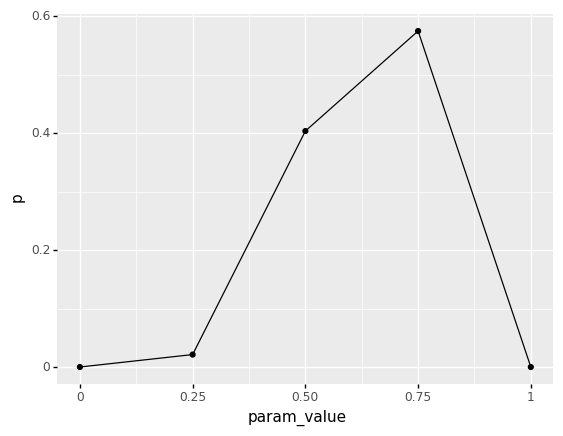

<ggplot: (308387774)>

In [36]:
(ggplot(posterior_grid_approx(5), aes(x='param_value', y='p'))
+ geom_line()
+ geom_point())

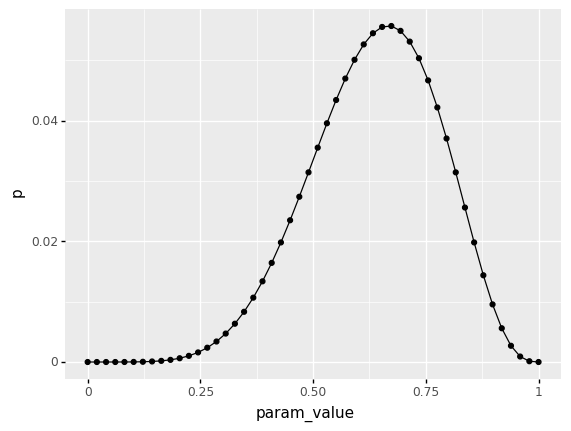

<ggplot: (308445959)>

In [37]:
(ggplot(posterior_grid_approx(50), aes(x='param_value', y='p'))
+ geom_line()
+ geom_point())

# Quadratic Approximation

- Under general assumptions, near the mode the posterior is approximately Gaussian. Log-posterior is then a quadratic function we can fit via an optimization procedure.
- Uniform prior + Binomial likelihood leads to a Beta Posterior, which kind of matches the beta's parameters interpretation as 'fake trials'.

# Metropolis

In [ ]:
def posterior_metropolis_approx(samples=5, success=6, tosses=9):
    """
    Using a half normal distribution as 
    proposal
    """
    old_sample = 0.5
    samples = []
    for i in range(n_samples): 
        
        new_sample = stats.norm.rvs(loc=old_sample, scale=1, size=1, random_state=None)
        if new_sample < 0:
            # this turns normal into half normal.
            new_sample *= -1
        if new_sample > 1:
        p_new_sample = stats.binom.pmf(success, success+tosses, new_sample)
        p_old_sample = stats.binom.pmf(success, success+tosses, old_sample)
        # accept with prob p(p_new)/p(p_old)
        if stats.uniform(0,1) < p_new_sample/p_old_sample:
            samples.append(new_sample)
            old_sample = new_sample
        else:
            samples.append(old_sample)
    return samples

In [ ]:
(ggplot(posterior_metropolis_approx(5), aes(x='param_value', y='p'))
+ geom_line()
+ geom_point())

# Metropolis

In [ ]:
def posterior_metropolis_approx(samples=5, success=6, tosses=9):
    """
    Using a half normal distribution as 
    proposal
    """
    old_sample = 0.5
    samples = []
    for i in range(n_samples): 
        
        new_sample = stats.norm.rvs(loc=old_sample, scale=1, size=1, random_state=None)
        if new_sample < 0:
            # this turns normal into half normal.
            new_sample *= -1
        if new_sample > 1:
        p_new_sample = stats.binom.pmf(success, success+tosses, new_sample)
        p_old_sample = stats.binom.pmf(success, success+tosses, old_sample)
        # accept with prob p(p_new)/p(p_old)
        if stats.uniform(0,1) < p_new_sample/p_old_sample:
            samples.append(new_sample)
            old_sample = new_sample
        else:
            samples.append(old_sample)
    return samples

In [44]:
(ggplot(posterior_metropolis_approx(5), aes(x='param_value', y='p'))
+ geom_line()
+ geom_point())

NameError: name 'posterior_metropolis_approx' is not defined